# Vancouver Housing Data 2025 – Part 2: Exploratory Data Analysis (EAD) - Univariate

This notebook presents a **univariate descriptive analysis** of the cleaned and merged dataset prepared in Part 1.  
The aim is to explore patterns and disparities across Metro Vancouver jurisdictions by examining each variable independently:

- The aging profile of owner-occupied housing stock  
- Median **after-tax** household income and its change between 2015 and 2020  

We analyze the distribution of each indicator, highlight rankings among municipalities, and identify regional contrasts.  
These insights provide an initial foundation for understanding spatial and socioeconomic imbalances, guiding future urban planning and policy design.

---

## 1. Project Summary and Part 1 Recap

This project explores regional disparities in housing conditions across Metro Vancouver, focusing on two main dimensions:  
- 🏚️ The aging profile of owner-occupied dwellings  
- 💰 Median after-tax household income and its change between 2015 and 2020  

In **Part 1**, we imported, cleaned, and merged two key datasets from the Metro Vancouver Housing Data Book 2025:
- Table 3.1.2 – Owner-occupied dwellings by construction period  
- Table 1.5.1 – Median household income by jurisdiction

In this notebook, we begin the exploratory data analysis phase.  
We will now generate core indicators, such as the **share of housing older than 40 years**, and explore income distributions and disparities between municipalities. 

---

### Part 2   Objectives

- Load the cleaned and merged dataset prepared in Part 1  
- Perform **univariate descriptive analysis** of housing and income indicators  
- Explore the distribution of aging housing stock across Metro Vancouver jurisdictions  
- Analyze regional variation in median after-tax household income (2020)  
- Examine changes in income levels between 2015 and 2020  
- Highlight patterns and disparities to support future **multivariate analysis** and clustering in Part 3

---

### Data Sources

- Dataset: `merged_housing_income_data.pkl`  
- Variables of interest:
  - `percent_40plus` – % of dwellings built before 1981  
  - `growth_index` (if available) – recent construction ratio  
  - `income_2020_total`, `income_2015_total`  
  - `change_total_2015_2020`

Data Source:
The datasets used in this project were retrieved from:
[Metro Vancouver Housing Data Book 2025](https://metrovancouver.org/services/regional-planning/housing-data-book),  
available through the Metro Vancouver Regional Planning Division.

---

### Final Output
This univariate analysis provides a foundational understanding of housing age and income patterns across Metro Vancouver.  
It highlights key disparities and regional contrasts that will guide the next phase of the project.  
These insights will inform the development of **clustering models and Principal Component Analysis (PCA)** in Part 3, enabling a deeper exploration of multidimensional relationships across municipalities.

---

## 2. Load Clean Dataset

In this section, we load the cleaned and merged dataset prepared in Part 1.  
This file contains combined housing and income data by jurisdiction and will serve as the basis for our exploratory analysis.

In [110]:
# Load the merged dataset from Pickle format
import pandas as pd

df = pd.read_pickle("merged_housing_income_data.pkl")

# Keep only after-tax income variables by dropping the total income columns
df = df.drop(columns=["income_2015_total", "income_2020_total", "change_total_2015_2020"])

# Quick check: dimensions and column names
print(f"✅ Dataset loaded successfully: {df.shape[0]} rows × {df.shape[1]} columns")
df.columns

✅ Dataset loaded successfully: 23 rows × 13 columns


Index(['jurisdiction', 'total_owner_occupied', 'built_2016_2021',
       'built_2011_2015', 'built_2001_2010', 'built_1991_2000',
       'built_1981_1990', 'built_1971_1980', 'built_1961_1970',
       'built_pre_1961', 'income_2015_after_tax', 'income_2020_after_tax',
       'change_after_tax_2015_2020'],
      dtype='object')

---

## 3. Descriptive Statistics

This section summarizes the main housing and income indicators across Metro Vancouver jurisdictions.  
We begin by reviewing construction patterns by decade, including the proportion of homes built before 1981 (40+ years old), and then explore income levels and growth from 2015 to 2020.

Key indicators explored:
- 🏚️ `percent_40plus`: share of homes built before 1981
- 🏗️ Construction distribution by period (e.g., `built_pre_1961`, `built_1971_1980`, ...)
- 💰 `income_2020_after_tax`: current after-tax household income
- 📈 `change_after_tax_2015_2020`: after-tax income growth (5-year trend)

---

### 3.1 Dataset Structure and Summary Statistics

Before diving into specific indicators, we begin with a general overview of the dataset structure.  
This includes data types, non-null counts, and basic summary statistics to ensure the dataset is ready for analysis.

In [50]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   jurisdiction                23 non-null     object 
 1   total_owner_occupied        23 non-null     int64  
 2   built_2016_2021             23 non-null     int64  
 3   built_2011_2015             23 non-null     int64  
 4   built_2001_2010             23 non-null     int64  
 5   built_1991_2000             23 non-null     int64  
 6   built_1981_1990             23 non-null     int64  
 7   built_1971_1980             23 non-null     int64  
 8   built_1961_1970             23 non-null     int64  
 9   built_pre_1961              23 non-null     int64  
 10  income_2015_after_tax       23 non-null     int64  
 11  income_2020_after_tax       23 non-null     int64  
 12  change_after_tax_2015_2020  23 non-null     float64
dtypes: float64(1), int64(11), object(1)
m

,total_owner_occupied,built_2016_2021,built_2011_2015,built_2001_2010,built_1991_2000,built_1981_1990,built_1971_1980,built_1961_1970,built_pre_1961,income_2015_after_tax,income_2020_after_tax,change_after_tax_2015_2020
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,28090.652174,2716.739130,2403.695652,4712.826087,5452.826087,4403.043478,3761.739130,1770.217391,2866.521739,78282.608696,89456.521739,0.149088
std,37737.919901,3782.995929,3511.354380,7349.636173,7727.235014,5956.300282,4230.147646,1914.656080,5828.712324,19415.964663,20710.072782,0.051336
min,230.000000,10.000000,0.000000,25.000000,30.000000,45.000000,20.000000,0.000000,0.000000,45600.000000,58000.000000,0.061728
25%,4580.000000,400.000000,425.000000,867.500000,1010.000000,652.500000,622.500000,115.000000,172.500000,62000.000000,73000.000000,0.109352
50%,14540.000000,965.000000,1085.000000,1870.000000,2275.000000,1990.000000,2100.000000,1025.000000,1135.000000,80000.000000,89000.000000,0.144578
75%,33607.500000,3500.000000,3122.500000,4387.500000,6590.000000,5560.000000,5465.000000,3225.000000,2500.000000,84500.000000,95000.000000,0.188054
max,138850.000000,13705.000000,13415.000000,29470.000000,27475.000000,23670.000000,14350.000000,6345.000000,28025.000000,123000.000000,138000.000000,0.271930


---

#### Initial Insights – Housing & Income

- Construction Trends: Housing peaked in the 1990s–2000s and declined steadily after 2010, with older units (pre-1980) still forming a large share in many areas.

- Income Distribution: After-tax household income in 2020 averages ~$89K, but ranges widely across regions (from $58K to $138K).

---

### 3.2 Thematic Exploration of Key Variables

This section examines the dataset in focused blocks—starting with housing construction periods, followed by income dynamics. By organizing variables thematically, we aim to surface meaningful patterns and disparities across jurisdictions, supporting clearer storytelling in the analysis ahead.

Thematic blocks:

🏗️ Housing Construction Overview

📊 Income Evolution (after-tax household income in 2015 and 2020)

📈 Growth Rate of Income (relative change from 2015 to 2020)

🧓 Aging Housing Stock (% of homes built 40+ years ago)

---

#### Block 1: Housing Construction Overview

This block provides an overview of how housing construction has evolved across Metro Vancouver jurisdictions over the past decades.  
We examine the number of owner-occupied homes built in each historical period to identify construction peaks, stagnation, and long-term development patterns.  

This helps set the context for analyzing the aging of the housing stock and shifts in urban growth.

🏗️ Total Units Built by Construction Period


built_1991_2000    125,415.0
built_2001_2010    108,395.0
built_1981_1990    101,270.0
built_1971_1980     86,520.0
built_pre_1961      65,930.0
built_2016_2021     62,485.0
built_2011_2015     55,285.0
built_1961_1970     40,715.0
dtype: object


📊 Mean Units Built by Construction Period (per jurisdiction)


built_1991_2000    5,452.8
built_2001_2010    4,712.8
built_1981_1990    4,403.0
built_1971_1980    3,761.7
built_pre_1961     2,866.5
built_2016_2021    2,716.7
built_2011_2015    2,403.7
built_1961_1970    1,770.2
dtype: object

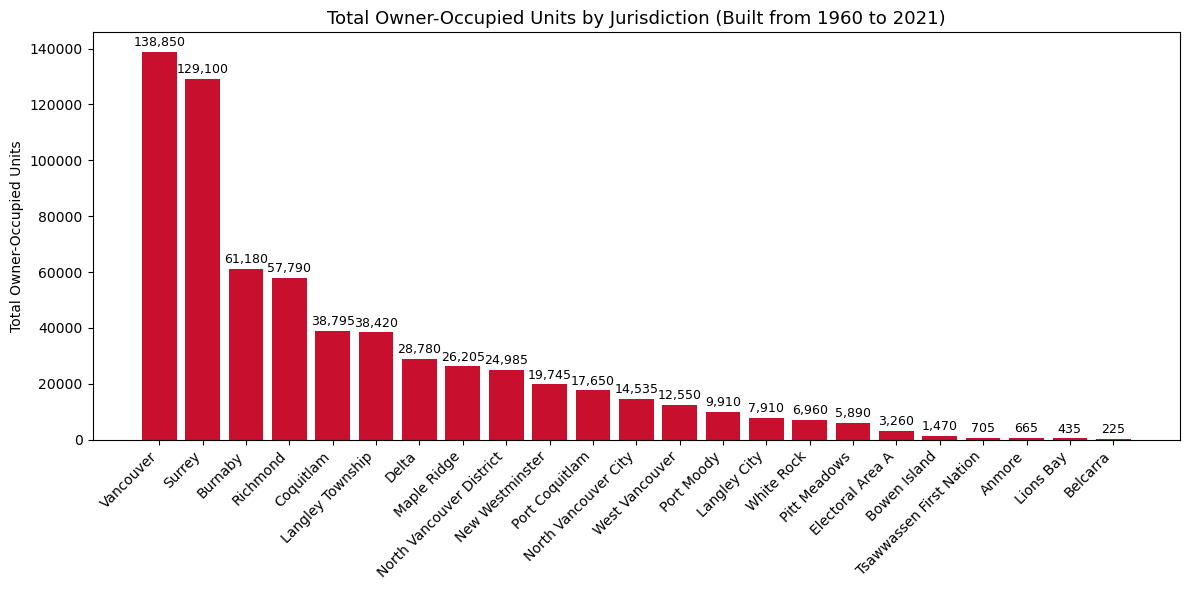

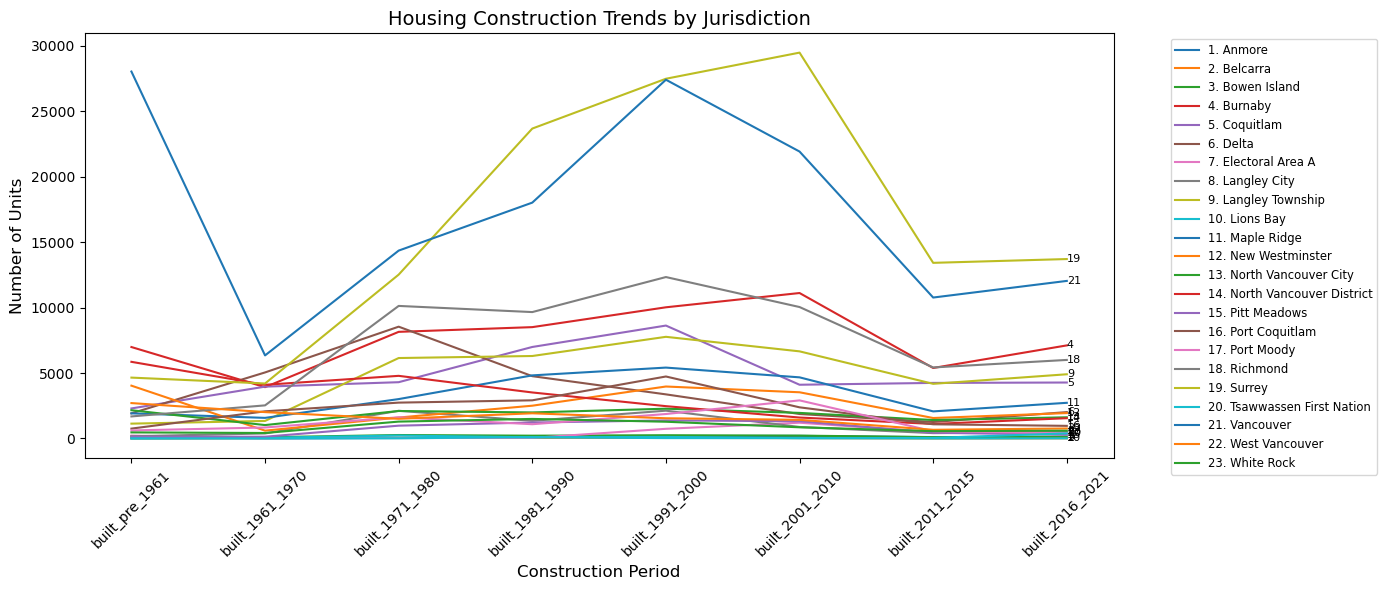

In [118]:
# Step 1: Select construction period columns and create subset
construction_cols = [col for col in df.columns if col.startswith("built_")]
df_construction = df[["jurisdiction"] + construction_cols].copy()

# Step 2: Total units built by construction period
print("🏗️ Total Units Built by Construction Period")
total_units_by_period = df_construction[construction_cols] \
    .sum() \
    .sort_values(ascending=False) \
    .apply(lambda x: f"{x:,.1f}")
display(total_units_by_period)

# Step 3: Mean units built by construction period
print("\n📊 Mean Units Built by Construction Period (per jurisdiction)")
mean_units_by_period = df_construction[construction_cols] \
    .mean() \
    .sort_values(ascending=False) \
    .apply(lambda x: f"{x:,.1f}")
display(mean_units_by_period)

# Step 4: Plot bar chart of total units by jurisdiction

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
bars = plt.bar(df_sorted["jurisdiction"], df_sorted["total_units_built"], color="#C8102E")

# Add total values above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1000, f"{int(yval):,}", 
             ha='center', va='bottom', fontsize=9)

# Axis and layout settings
plt.xticks(rotation=45, ha='right')
plt.ylabel("Total Owner-Occupied Units")
plt.title("Total Owner-Occupied Units by Jurisdiction (Built from 1960 to 2021)", fontsize=13)
plt.tight_layout()
plt.show()

# Step 4: Plot Line Chart of Housing Construction Trends (1961–2021)

# Reorder the period columns from oldest to most recent
ordered_cols = ['built_pre_1961', 'built_1961_1970', 'built_1971_1980',
                'built_1981_1990', 'built_1991_2000', 'built_2001_2010',
                'built_2011_2015', 'built_2016_2021']

# Prepare the dataframe with periods as index
df_ordered = df[['jurisdiction'] + ordered_cols].set_index('jurisdiction')

# Plot
fig, ax = plt.subplots(figsize=(14, 6))
for i, (index, row) in enumerate(df_ordered.iterrows()):
    ax.plot(ordered_cols, row, label=f"{i+1}. {index}")
    
    # Add the number at the last point using .iloc (fixes warning)
    ax.text(ordered_cols[-1], row.iloc[-1], str(i+1),
            fontsize=8, verticalalignment='center')

# Titles and labels
ax.set_title("Housing Construction Trends by Jurisdiction", fontsize=14)
ax.set_xlabel("Construction Period", fontsize=12)
ax.set_ylabel("Number of Units", fontsize=12)
plt.xticks(rotation=45)

# Move legend outside the plot
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

plt.tight_layout()
plt.show()


---

#### Insights – Housing Construction Overview

- **Most housing was built between 1981 and 2000**  
  The majority of owner-occupied units were constructed in 1981–2000, especially between 1991–2000 (~125k units), suggesting that a significant portion of the stock is now over 20 years old.

- **Construction declined after 2010**  
  There is a noticeable drop in new housing after 2010, particularly between 2011–2015, which may reflect space constraints, rising land costs, or tighter regulations.

- **Vancouver and Surrey dominate in total units**  
  Vancouver (138,850) and Surrey (129,100) have the highest number of owner-occupied units, likely due to their population size and urban expansion.

- **Surrey shows recent growth trends**  
  Surrey stands out with a sharp rise in construction from the 1980s to 2000s, peaking in 2001–2010. This contrasts with more stable or declining trends in cities like West Vancouver.

- **Different growth profiles across cities**  
  Jurisdictions like Coquitlam and Langley Township have experienced recent expansion, while areas like West Vancouver appear to be reaching development saturation.

- **Policy implications**  
  Municipalities with a high share of older housing (built pre-1980) may require targeted investments in retrofitting and infrastructure renewal.

---


#### Block 2: Aging indicator - Share of Homes 40+ Years Old

This block calculates the percentage distribution of owner-occupied homes by construction period for each municipality, with a specific focus on identifying aging housing stock.

An indicator is created to capture the proportion of homes built before 1981, representing those that are 40+ years old as of the 2021 Census.
This helps assess potential structural vulnerabilities and supports strategic planning for renovation, safety, and sustainability efforts across municipalities.

In [128]:
# Step 1: Define construction period columns
construction_cols = [
    'built_pre_1961', 'built_1961_1970', 'built_1971_1980',
    'built_1981_1990', 'built_1991_2000', 'built_2001_2010',
    'built_2011_2015', 'built_2016_2021'
]

# Step 2: Calculate total housing units per city
df['total_units'] = df[construction_cols].sum(axis=1)

# Step 3: Calculate period percentages per city
percent_by_city = df[['jurisdiction']].copy()
for col in construction_cols:
    percent_by_city[col] = (df[col] / df['total_units'] * 100).round(1)
percent_by_city = percent_by_city.set_index('jurisdiction')

# Step 4: Calculate aging indicator (40+ years)
old_cols = ['built_pre_1961', 'built_1961_1970', 'built_1971_1980']
df['units_40plus'] = df[old_cols].sum(axis=1)
df['percent_40plus'] = (df['units_40plus'] / df['total_units'] * 100).round(1)

# Step 5: Build final risk table
risk_columns = ['jurisdiction', 'total_units', 'units_40plus', 'percent_40plus']
risk_by_region = df[risk_columns].sort_values(by='percent_40plus', ascending=False).reset_index(drop=True)

# Step 6: Display
display(percent_by_city.style.format("{:.2f}%"))
display(risk_by_region)

,built_pre_1961,built_1961_1970,built_1971_1980,built_1981_1990,built_1991_2000,built_2001_2010,built_2011_2015,built_2016_2021
jurisdiction,,,,,,,,
Anmore,3.00%,2.30%,4.50%,9.00%,27.10%,30.10%,15.00%,9.00%
Belcarra,0.00%,13.30%,28.90%,20.00%,20.00%,13.30%,0.00%,4.40%
Bowen Island,11.90%,6.50%,18.00%,14.60%,17.00%,15.00%,7.10%,9.90%
Burnaby,11.40%,6.40%,13.30%,13.90%,16.40%,18.20%,8.80%,11.60%
Coquitlam,5.90%,10.20%,11.10%,18.00%,22.20%,10.60%,10.90%,11.00%
Delta,6.70%,17.50%,29.70%,16.50%,11.70%,6.50%,4.40%,7.00%
Electoral Area A,6.70%,0.30%,1.50%,1.40%,22.70%,37.00%,15.20%,15.20%
Langley City,2.10%,4.90%,26.70%,17.10%,26.90%,11.10%,5.20%,6.00%
Langley Township,3.00%,3.50%,16.00%,16.40%,20.20%,17.30%,10.90%,12.80%


,jurisdiction,total_units,units_40plus,percent_40plus
0,Lions Bay,435,280,64.4
1,North Vancouver District,24985,14740,59.0
2,Delta,28780,15505,53.9
3,West Vancouver,12550,6225,49.6
4,Belcarra,225,95,42.2
5,Bowen Island,1470,535,36.4
6,North Vancouver City,14535,5285,36.4
7,Vancouver,138850,48720,35.1
8,Langley City,7910,2670,33.8
9,New Westminster,19745,6235,31.6


---
#### Insights – Aging Indicator (Share of Homes 40+ Years Old)

- **Significant aging in several jurisdictions**  
  Lions Bay (64.4%), North Vancouver District (59.0%), and Delta (53.9%) have the highest shares of housing units over 40 years old, suggesting possible needs for renewal, safety inspections, or energy retrofits.

- **Urban centers also show signs of aging stock**  
  Vancouver, despite its large housing stock, has 35.1% of units built before 1980. West Vancouver reaches nearly 50%, reinforcing the importance of long-term infrastructure planning in high-density areas.

- **Contrasts between older and newer growth zones**  
  While some jurisdictions have over 50% of aging homes, others such as Tsawwassen First Nation (4.3%) and Surrey (16.5%) show much newer profiles, reflecting recent urban development.

- **Uneven aging across the region**  
  The disparities in aging rates highlight different development timelines and policy needs. Municipalities with higher aging shares may require targeted interventions, while fast-growing areas need sustainable growth planning.

- **Strategic implication**  
  The aging indicator is a valuable tool for identifying areas with high renovation potential and planning future housing policies aligned with infrastructure lifecycle and resident needs.

---

#### Block 3: Income Levels 

This block explores the after-tax income profile across Metro Vancouver jurisdictions.  
We focus on two key indicators:

- `income_2020_after_tax`: the median household income after taxes in 2020  
- `change_after_tax_2015_2020`: the percentage change in median income between 2015 and 2020

These indicators help identify disparities in financial capacity across regions and provide context for understanding potential vulnerabilities in relation to housing age and development.

In [126]:
# Step 1: Describe after-tax income indicators
income_cols = ["income_2020_after_tax", "change_after_tax_2015_2020"]

desc = df[income_cols].describe()

# Apply formatting to each column
formatted_desc = desc.apply(lambda col: col.map(lambda x: f"{x:,.1f}"))

display(formatted_desc)

# Step 2: Top 5 jurisdictions by income in 2020
top_income = df[["jurisdiction", "income_2020_after_tax"]].sort_values(by="income_2020_after_tax", ascending=False).head(5)

# Format only the numeric column
top_income["income_2020_after_tax"] = top_income["income_2020_after_tax"].map(lambda x: f"{x:,.1f}")

display(top_income)

# Step 3: Bottom 5 jurisdictions by income in 2020
bottom_income = df[["jurisdiction", "income_2020_after_tax"]].sort_values(by="income_2020_after_tax", ascending=True).head(5)

# Format only the numeric column
bottom_income["income_2020_after_tax"] = bottom_income["income_2020_after_tax"].map(lambda x: f"{x:,.1f}")

display(bottom_income)

# Step 4.1: Top 5 jurisdictions with the highest increase in after-tax income
top_growth = df[["jurisdiction", "change_after_tax_2015_2020"]].sort_values(by="change_after_tax_2015_2020", ascending=False).head(5)

# Format the percentage
top_growth["change_after_tax_2015_2020"] = top_growth["change_after_tax_2015_2020"].map(lambda x: f"{x*100:.1f}%")

display(top_growth)

# Step 4.2: Bottom 5 jurisdictions with the lowest increase in after-tax income
bottom_growth = df[["jurisdiction", "change_after_tax_2015_2020"]].sort_values(by="change_after_tax_2015_2020", ascending=True).head(5)

# Format the percentage
bottom_growth["change_after_tax_2015_2020"] = bottom_growth["change_after_tax_2015_2020"].map(lambda x: f"{x*100:.1f}%")

display(bottom_growth)

,income_2020_after_tax,change_after_tax_2015_2020
count,23.0,23.0
mean,"89,456.5",0.1
std,"20,710.1",0.1
min,"58,000.0",0.1
25%,"73,000.0",0.1
50%,"89,000.0",0.1
75%,"95,000.0",0.2
max,"138,000.0",0.3


,jurisdiction,income_2020_after_tax
1,Belcarra,"138,000.0"
0,Anmore,"136,000.0"
9,Lions Bay,"121,000.0"
13,North Vancouver District,"106,000.0"
16,Port Moody,"99,000.0"


,jurisdiction,income_2020_after_tax
6,Electoral Area A,"58,000.0"
22,White Rock,"65,000.0"
7,Langley City,"69,000.0"
17,Richmond,"71,000.0"
20,Vancouver,"72,000.0"


,jurisdiction,change_after_tax_2015_2020
6,Electoral Area A,27.2%
7,Langley City,22.3%
1,Belcarra,21.1%
12,North Vancouver City,19.5%
3,Burnaby,19.3%


,jurisdiction,change_after_tax_2015_2020
19,Tsawwassen First Nation,6.2%
9,Lions Bay,8.0%
21,West Vancouver,8.4%
13,North Vancouver District,10.4%
5,Delta,10.5%


---
#### Insights – Income Levels (2020) and Change (2015–2020)

- **Substantial income disparity across municipalities**  
  After-tax median household income in 2020 ranged from **$58,000** (Electoral Area A) to **$138,000** (Belcarra), revealing a gap of $80,000 between the lowest and highest jurisdictions.

- **Overall regional median near $89,000**  
  The regional median was approximately **$89,000**, with 50% of jurisdictions earning between $73,000 and $95,000, indicating a relatively balanced central distribution but with strong outliers at both ends.

- **High-income outliers concentrated in small municipalities**  
  The top incomes were found in smaller, low-density jurisdictions like **Belcarra**, **Anmore**, and **Lions Bay**, suggesting potential links to wealth concentration in exclusive residential areas.

- **Urban cores among the lowest earners**  
  Surprisingly, larger and denser areas like **Vancouver** ($72,000) and **Richmond** ($71,000) ranked in the bottom tier, possibly due to a more diverse socioeconomic profile or housing affordability pressures.

- **Top growth in emerging or mid-range areas**  
  The highest income growth between 2015 and 2020 was seen in **Electoral Area A** (+27.2%), **Langley City** (+22.3%), and **Belcarra** (+21.1%), suggesting economic momentum in these areas.

- **Wealthier areas not always leading in growth**  
  Despite high income levels, municipalities like **Lions Bay** and **West Vancouver** showed modest growth rates (8.0% and 8.4%, respectively), indicating income saturation or slower wage progression.

- **Policy implication**  
  Disparities in both income levels and growth highlight the need for tailored economic and housing strategies. Support may be needed in lower-income urban cores, while infrastructure and affordability planning remain essential in high-growth areas.


---

## 4. Key Takeaways – Univariate Descriptive Analysis

- **Housing Stock Aging is Uneven and Regionally Concentrated**  
  While some jurisdictions like Lions Bay, North Vancouver District, and Delta have over 50% of their housing stock older than 40 years, others such as Surrey and Tsawwassen First Nation have much newer housing profiles. This reflects differing development timelines and potential infrastructure renewal needs.

- **Recent Decline in Housing Construction**  
  Construction of new homes has declined significantly since 2010 across most jurisdictions, particularly in areas already densely developed. This may signal constraints in land availability, rising construction costs, or planning limitations.

- **Income Levels Vary Widely Across the Region**  
  Median after-tax household income in 2020 ranged from $58,000 to $138,000. Small, high-income jurisdictions like Belcarra and Anmore contrast sharply with urban centers like Vancouver and Richmond, which reported among the lowest median incomes.

- **Not All High-Income Areas Show Strong Growth**  
  While some emerging municipalities experienced strong income growth (e.g., Langley City, Electoral Area A), many high-income areas had relatively modest increases between 2015 and 2020, possibly indicating wage stagnation at the top.

- **Disparities Call for Differentiated Policy Approaches**  
  The data reveals both spatial and socioeconomic disparities across Metro Vancouver. These findings can inform targeted strategies for urban renewal, housing affordability, income support, and sustainable growth planning.

These univariate insights set the stage for deeper analysis. In the next phase, we will explore **cross-variable patterns** to better understand how aging housing stock, income levels, and regional development interact.


---
## 5. Export Final Dataset with Aging Indicator

The dataset now includes the calculated variable `percent_40plus`, representing the share of housing stock built before 1981.  
We save this enriched dataset for use in multivariate analysis in Notebook 3.

In [165]:
# Save updated dataset
df.to_pickle("merged_housing_income_data_updated.pkl")
print("✅ Updated dataset with aging indicator saved successfully!")

✅ Updated dataset with aging indicator saved successfully!


---

## 6. Summary

In this second notebook, we conducted a **univariate descriptive analysis** to explore housing and income characteristics across Metro Vancouver jurisdictions. The main steps included:

- Loading the cleaned and merged dataset prepared in Notebook 1
- Calculating the share of housing units built before 1980 as an indicator of stock aging
- Visualizing total and decade-based housing construction trends by jurisdiction
- Analyzing median after-tax household income in 2020 across municipalities
- Examining income growth between 2015 and 2020 to identify economic shifts
- Highlighting disparities and patterns in both housing age and income distributions

The insights generated here reveal spatial and socioeconomic contrasts that will guide further exploration.  
This analysis sets the foundation for **clustering and multivariate techniques** in Notebook 3, where we will investigate deeper relationships between variables and group similar jurisdictions.